In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('customer_churn_dataset.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2711,0431-APWVY,Female,0,Yes,Yes,28,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),90.1,2598.95,Yes
2572,9153-BTBVV,Female,0,Yes,No,71,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.0,1753,No
3003,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.5,2180.55,Yes
1064,3800-LYTRK,Female,0,No,No,14,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,55.7,795.15,No
2593,0962-CQPWQ,Female,0,Yes,Yes,62,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.3,1296.15,No


In [3]:
df.drop(columns=['customerID'], inplace=True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(7043,), dtype=object)

In [14]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [15]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [16]:
df.iloc[488].TotalCharges

' '

In [19]:
df.shape

(7043, 20)

In [20]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [21]:
df[df.TotalCharges==' '].shape

(11, 20)

In [23]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [26]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [27]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [28]:
df1.Churn.value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [45]:
df1.Churn.value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

So, from the data, 73.5% Customers are staying while 26.5% are leaving

(array([[ 877.,  259.,  159.,  114.,  102.,   98.,   72.,   70.,   46.,
           72.],
        [ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.]]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 BarContainer objects>)

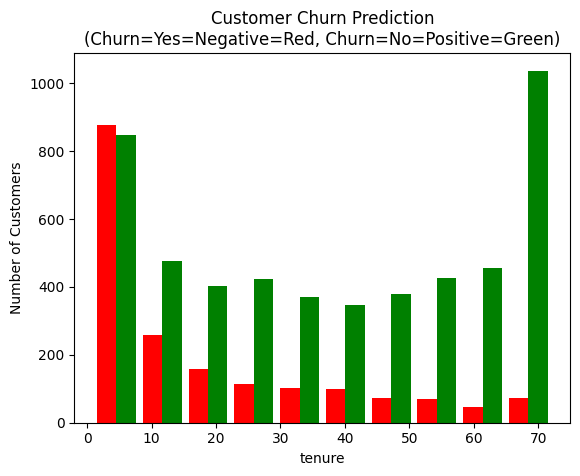

In [42]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction\n(Churn=Yes=Negative=Red, Churn=No=Positive=Green)')

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.85, color=['red', 'green'],
         label=['Churn=Yes=Negative', 'Churn=No=Positive'])

## Analysis of Customer Tenure and Churn

From the histogram above, we can observe that customers with longer tenure are less likely to leave the company. The distribution shows that:

- **New customers (0-20 months tenure)** have a higher churn rate, as indicated by the red bars being more prominent in the early tenure periods
- **Long-term customers (40+ months tenure)** show significantly lower churn rates, with green bars dominating the higher tenure ranges
- This suggests that customer retention strategies should focus on the critical early months of the customer lifecycle

(array([[ 148.,   57.,  119.,  152.,   53.,  350.,  355.,  319.,  273.,
           43.],
        [1452.,  134.,  246.,  485.,  419.,  544.,  597.,  550.,  485.,
          251.]]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <a list of 2 BarContainer objects>)

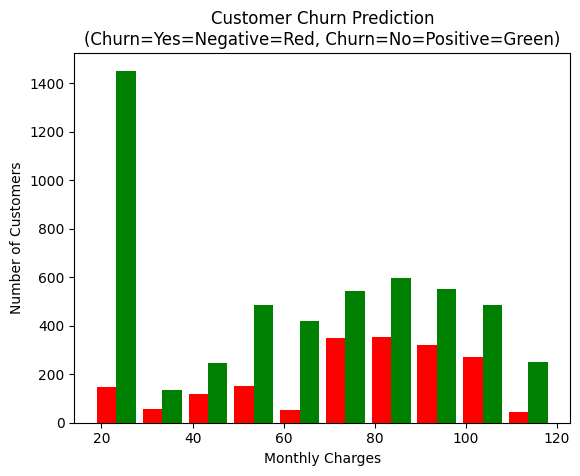

In [44]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction\n(Churn=Yes=Negative=Red, Churn=No=Positive=Green)')

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.85, color=['red', 'green'],
         label=['Churn=Yes=Negative', 'Churn=No=Positive'])

## Analysis of Monthly Charges and Customer Churn

The histogram above reveals interesting patterns in customer churn behavior related to monthly charges:

- **Lower monthly charges (under $30)** show a higher proportion of loyal customers (green bars), suggesting that customers with affordable pricing plans are more likely to stay with the company
- **Higher monthly charges ($70-$100+)** demonstrate increased churn rates, with red bars becoming more prominent, indicating that customers paying premium prices are more likely to leave
- **Mid-range charges ($30-$70)** show a mixed pattern, but generally customers with lower charges within this range tend to be more loyal

This analysis suggests that pricing strategy plays a crucial role in customer retention, with competitive pricing being a key factor in maintaining customer loyalty.